# LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import csv

# - METACRITIC DATASET -

## Original Data Frame <br><br>(game_title, genre, platforms, release_date, developer, metascore_rating)

<font color="#333" size="2px"> NOTE: Data set is gathered through my own web crawler script made in Python (Data may be incomplete due to limitations in the content of metacritic.com) </font>
#### Number of recorded titles (includes repeated data) : <font color="red" size="2.5"> 15,735 </font>
#### Row Headings:

- __game_title:__ Published title of video game product 
- __genre:__ Genre(s) of video game product
- __platforms:__ Platform(s) that supports the video game product
- __release_date:__ Date when the video game was released
- __metascore_rating:__ Given review score by metacritic.com


In [2]:
metacritic_df = pd.read_csv("metacritic_dataset.csv")

# Preview of first 10 rows
metacritic_df.head(10)

,game_title,genre,platforms,release_date,developers,metascore_rating
0,Journey,Action|Platformer|3D,PlayStation 4|PC|PlayStation 3,Jul 21 2015,Tricky Pixels,92
1,Celeste,Action|Platformer|2D,PlayStation 4|iPhone/iPad|PC|Switch|Xbox One,Jan 25 2018,Matt Makes Games Inc.,91
2,INSIDE,Action|Platformer|2D,PlayStation 4|iPhone/iPad|PC|Switch|Xbox One,Aug 23 2016,PLAYDEAD,91
3,Overwatch,Tactical|Shooter|Action|First-Person,PlayStation 4|PC|Xbox One,May 23 2016,Blizzard Entertainment,90
4,Shovel Knight,Action|Platformer|2D,PlayStation 4|3DS|PC|PlayStation 3|PlayStation...,Apr 21 2015,Yacht Club Games,90
5,Rayman Legends,Action|Platformer|2D,PlayStation 4|PC|PlayStation 3|PlayStation Vit...,Feb 18 2014,Ubisoft Montpellier,90
6,Fez,Action|Platformer|2D,PlayStation 4|iPhone/iPad|PC|PlayStation 3|Pla...,Mar 25 2014,Polytron Corp.,90
7,Rez Infinite,Shooter|Action|Rail,PlayStation 4|PC,Oct 13 2016,Q Entertainment| Monstars Inc.| Enhance Games,89
8,Titanfall 2,Shooter|Action|Arcade|First-Person,PlayStation 4|PC|Xbox One,Oct 28 2016,Respawn Entertainment,89
9,Apex Legends,Tactical|Shooter|Action|First-Person,PlayStation 4|PC|Xbox One,Feb 4 2019,Respawn Entertainment,89


## Data Frame with grouped by "game_title"
- __Unique Game Title Count:__ <font color = red> 9280</font> 

#### Average metascore rating across different platforms

In [3]:
average_rating_sf = metacritic_df.groupby('game_title')['metascore_rating'].apply(np.mean)

# 'rating' series frame to data frame
average_rating_df = pd.DataFrame({'game_title':average_rating_sf.index, 'average_metascore_ratings':average_rating_sf.values.round(decimals = 2)})

#### Grouped Data Frame with Avg. metascore ratings

In [4]:
# Data frame that removes any duplicate values in "game_title" row
unique_titles_df = metacritic_df.drop_duplicates(subset=['game_title'])

# Merge unique_titles_df with rating
unique_metacritic_df = unique_titles_df.drop('metascore_rating', axis=1).merge(average_rating_df, on="game_title")

# Preview of first 10 rows sorted by average_metascore_ratings
unique_metacritic_df.sort_values(by='average_metascore_ratings', ascending = False).head(10)

,game_title,genre,platforms,release_date,developers,average_metascore_ratings
1851,Super Mario Odyssey,Action|3D|Platformer,Switch,Oct 27 2017,Nintendo,97.0
2283,The Orange Box,Miscellaneous|Shooter|Action|Sci-Fi|First-Pers...,PC|PlayStation 3|Xbox 360,Oct 10 2007,Valve Software,96.0
2284,Half-Life,Arcade|Shooter|Sci-Fi|First-Person|Action,PC|PlayStation 2,Nov 19 1998,Valve Software,96.0
2282,Half-Life 2,Arcade|Shooter|Sci-Fi|First-Person|Action,PC,Nov 16 2004,Valve Software,96.0
6896,Super QuickHook,General|Platformer|Action|2D|Adventure,iOS,Jun 17 2010,Rocketcat Games,96.0
5453,Out of the Park Baseball 2007,Sports|Traditional|Baseball|Sim|Management|Team,PC,Mar 23 2006,Sports Interactive,96.0
8934,The World Ends with You: Solo Remix for iPad,General|Role-Playing,iOS,Aug 27 2012,h.a.n.d. Inc.,95.0
4799,Baldur's Gate II: Shadows of Amn,Role-Playing|Western-Style|PC-style RPG,PC,Sep 24 2000,BioWare,95.0
2286,Portal 2,Arcade|Shooter|Sci-Fi|First-Person|Action,PC|PlayStation 3|Xbox 360,Apr 18 2011,Valve Software,95.0
6897,Super Stickman Golf 3,Sports|General|Golf|Action|Individual|Arcade,iOS,Jul 7 2016,Noodlecake Studios,95.0


# - METACRITIC DATASET W/ ORGANIZED DATES - 

## Function for splitting date information

In [5]:
#Data placeholders
years = []
months = []
days = []

#Date Function
def split_date(date_array):
    #nested function for years:
    def year_to_int(year):
        try:
            return int(year)
        except:
            return 0
    
    #nested function for months
    def month_to_int(month):
        if month=="Jan":
            return 1
        elif month=="Feb":
            return 2
        elif month=="Mar":
            return 3
        elif month=="Apr":
            return 4
        elif month=="May":
            return 5
        elif month=="Jun":
            return 6
        elif month=="Jul":
            return 7
        elif month=="Aug":
            return 8
        elif month=="Sep":
            return 9
        elif month=="Oct":
            return 10
        elif month=="Nov":
            return 11
        elif month=="Dec":
            return 12
        else:
            return 0
        
    #nested function for days
    def date_to_int(day):
        try:
            if day[1] == " ":
                return int(day[0])
            else:
                return int(day[:2])
        except:
            return 0
    
    for date in date_array:
        years.append(year_to_int(date[-4:]))
        months.append(month_to_int(date[:3]))
        days.append(date_to_int(date[4:]))
        
split_date(list(unique_metacritic_df[' release_date']))

## Updated Metacritic Dataset

In [6]:
#Creates a copy of the dataset inorder for the original to be unchanged
updated_metacritic_df = unique_metacritic_df.copy()

#Replaces release_date with three new columns (release_year, release_month, release_day)
updated_metacritic_df = updated_metacritic_df.drop([" release_date"],axis=1)
updated_metacritic_df.insert(4,"release_year",years)
updated_metacritic_df.insert(5,"release_month",months)
updated_metacritic_df.insert(6,"release_day",days)

In [7]:
# Preview of first 10 rows
updated_metacritic_df.sort_values(by='average_metascore_ratings', ascending = False).head(10)

,game_title,genre,platforms,developers,release_year,release_month,release_day,average_metascore_ratings
1851,Super Mario Odyssey,Action|3D|Platformer,Switch,Nintendo,2017,10,27,97.0
2283,The Orange Box,Miscellaneous|Shooter|Action|Sci-Fi|First-Pers...,PC|PlayStation 3|Xbox 360,Valve Software,2007,10,10,96.0
2284,Half-Life,Arcade|Shooter|Sci-Fi|First-Person|Action,PC|PlayStation 2,Valve Software,1998,11,19,96.0
2282,Half-Life 2,Arcade|Shooter|Sci-Fi|First-Person|Action,PC,Valve Software,2004,11,16,96.0
6896,Super QuickHook,General|Platformer|Action|2D|Adventure,iOS,Rocketcat Games,2010,6,17,96.0
5453,Out of the Park Baseball 2007,Sports|Traditional|Baseball|Sim|Management|Team,PC,Sports Interactive,2006,3,23,96.0
8934,The World Ends with You: Solo Remix for iPad,General|Role-Playing,iOS,h.a.n.d. Inc.,2012,8,27,95.0
4799,Baldur's Gate II: Shadows of Amn,Role-Playing|Western-Style|PC-style RPG,PC,BioWare,2000,9,24,95.0
2286,Portal 2,Arcade|Shooter|Sci-Fi|First-Person|Action,PC|PlayStation 3|Xbox 360,Valve Software,2011,4,18,95.0
6897,Super Stickman Golf 3,Sports|General|Golf|Action|Individual|Arcade,iOS,Noodlecake Studios,2016,7,7,95.0


In [8]:
# Remove '#' to create csv file

# updated_metacritic_df.to_csv("updated_metacritic_dataset.csv")

   # - METACRITIC DATASET W/ LISTS (genre, platforms, developers) -

## Function for converting string data to lists

In [9]:
# Return a new list
def str_to_lst(data_array):
    column = []
    for item in data_array:
        lst = []
        data = item + "|"
        start = 0
        end = 0
        for letter in data:
            if letter != "|":
                end += 1
            else:
                lst = lst + [data[start:end]]
                start = end + 1
                end += 1
        column = column + [lst]
    return column        

## New Column Data Sets

In [10]:
new_genre = str_to_lst((updated_metacritic_df[' genre']))
new_platforms = str_to_lst((updated_metacritic_df[' platforms']))
new_developers = str_to_lst([str(i) for i in updated_metacritic_df[' developers']])

## - Updated Metacritic Dataset V2 - 

In [11]:
new_updated_metacritic_df = updated_metacritic_df.copy()
new_updated_metacritic_df[' genre'] = new_genre
new_updated_metacritic_df[' platforms'] = new_platforms
new_updated_metacritic_df[' developers'] = new_developers
new_updated_metacritic_df.columns = ['game_title', 'genre', 'platforms', 'developers', 'release_year','release_month', 'release_day', 'average_metascore_ratings']

# Preview of first 10 rows
new_updated_metacritic_df.head(10)

,game_title,genre,platforms,developers,release_year,release_month,release_day,average_metascore_ratings
0,Journey,"[Action, Platformer, 3D]","[PlayStation 4, PC, PlayStation 3]",[Tricky Pixels],2015,7,21,92.00
1,Celeste,"[Action, Platformer, 2D]","[PlayStation 4, iPhone/iPad, PC, Switch, Xbox ...",[Matt Makes Games Inc.],2018,1,25,91.25
2,INSIDE,"[Action, Platformer, 2D]","[PlayStation 4, iPhone/iPad, PC, Switch, Xbox ...",[PLAYDEAD],2016,8,23,90.50
3,Overwatch,"[Tactical, Shooter, Action, First-Person]","[PlayStation 4, PC, Xbox One]",[Blizzard Entertainment],2016,5,23,90.67
4,Shovel Knight,"[Action, Platformer, 2D]","[PlayStation 4, 3DS, PC, PlayStation 3, PlaySt...",[Yacht Club Games],2015,4,21,88.22
5,Rayman Legends,"[Action, Platformer, 2D]","[PlayStation 4, PC, PlayStation 3, PlayStation...",[Ubisoft Montpellier],2014,2,18,89.80
6,Fez,"[Action, Platformer, 2D]","[PlayStation 4, iPhone/iPad, PC, PlayStation 3...",[Polytron Corp.],2014,3,25,90.67
7,Rez Infinite,"[Shooter, Action, Rail]","[PlayStation 4, PC]","[Q Entertainment, Monstars Inc., Enhance Games]",2016,10,13,89.00
8,Titanfall 2,"[Shooter, Action, Arcade, First-Person]","[PlayStation 4, PC, Xbox One]",[Respawn Entertainment],2016,10,28,87.33
9,Apex Legends,"[Tactical, Shooter, Action, First-Person]","[PlayStation 4, PC, Xbox One]",[Respawn Entertainment],2019,2,4,88.33


In [12]:
# Remove '#' to create csv file

# new_updated_metacritic_df.to_csv("updated_metacritic_dataset_v2.csv")

# -METACRITIC DATASET ANALYSIS-

### Function for taking unique items in each column

In [13]:
def unique_items(df,title):
    dic = {}
    column = df[title]
    for row in column:
        for item in row:
            if item not in dic:
                dic[item] = 1
            else:
                dic[item] +=1
    return  dic

<font size="5"> <strong> &#187; Video Game Titles&#171; </strong></font>

#### Bargraph of Top 20 Highest Rated Video Game Titles

Text(0.5, 1.0, 'Top 20 Highest Rated Video Games (Metacritic)')

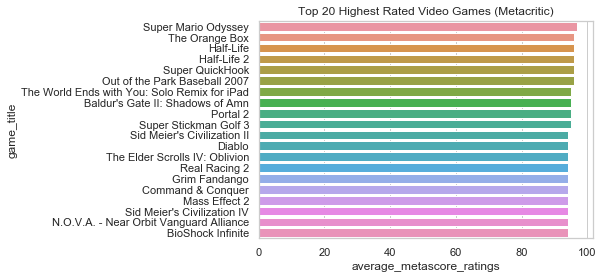

In [14]:
sns.set(style="whitegrid")
sns.barplot(x="average_metascore_ratings", y="game_title", data=new_updated_metacritic_df.sort_values(by="average_metascore_ratings",ascending=False).head(20)).set_title('Top 20 Highest Rated Video Games (Metacritic)')

<font size="5"> <strong> &#187; Video Game Genres &#171;</strong></font>

#### Popular Video Game Genres

In [15]:
unique_genres, genre_count = list(unique_items(new_updated_metacritic_df,'genre').keys()), list(unique_items(new_updated_metacritic_df,'genre').values())
unique_genres_df = pd.DataFrame({'genres':unique_genres, 'count':genre_count})

sorted_genres_df = unique_genres_df.sort_values(by=['count'], ascending= False).head(20)

#### Bargraph of Popular Video Game Genres

Text(0.5, 1.0, 'Top 20 Most Popular Video Game Genres (Metacritic)')

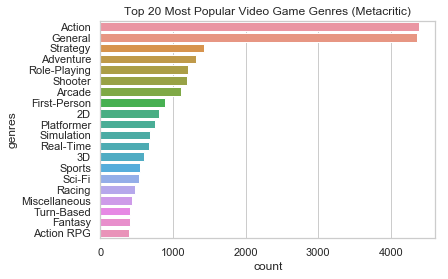

In [16]:
sns.set(style="whitegrid")
sns.barplot(x="count", y="genres", data=sorted_genres_df).set_title('Top 20 Most Popular Video Game Genres (Metacritic)')

<font size="5"> <strong> &#187; Video Game Platforms &#171;</strong></font>

#### Popular Video Game Platforms

In [17]:
unique_platforms, platform_count = list(unique_items(new_updated_metacritic_df,'platforms').keys()), list(unique_items(new_updated_metacritic_df,'platforms').values())
unique_platforms_df = pd.DataFrame({'platforms':unique_platforms, 'count':platform_count}).sort_values(by=['count'], ascending= False)

#### Bargraph of Popular Video Game Platforms

Text(0.5, 1.0, 'Top Video Game Platforms (Metacritic)')

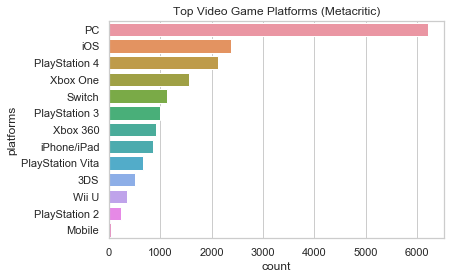

In [18]:
sns.set(style="whitegrid")
sns.barplot(x="count", y="platforms", data = unique_platforms_df).set_title('Top Video Game Platforms (Metacritic)')

<font size="5"> <strong> &#187; Video Game Developers &#171;</strong></font>

#### Popular Video Game Developers

In [19]:
unique_developers, developer_count = list(unique_items(new_updated_metacritic_df,'developers').keys()), list(unique_items(new_updated_metacritic_df,'developers').values())
unique_developers_df = pd.DataFrame({'developers':unique_developers, 'count':developer_count}).sort_values(by=['count'], ascending= False).head(21)
unique_developers_df = unique_developers_df[unique_developers_df.developers != 'nan']

#### Bargraph of Popular Video Game Developers

Text(0.5, 1.0, 'Top 20 Video Game Developers (Metacritic)')

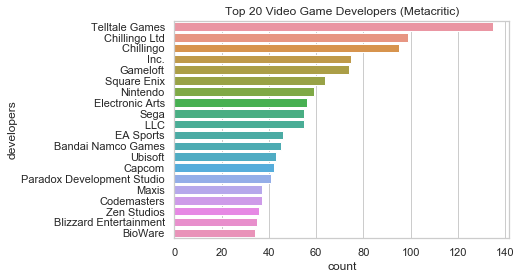

In [20]:
sns.set(style="whitegrid")
sns.barplot(x="count", y="developers", data = unique_developers_df).set_title('Top 20 Video Game Developers (Metacritic)')